In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib_venn import venn2

In [2]:
books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
members = pd.read_csv('../data/SCoData_members_v1.2_2022_01.csv', encoding='utf-8')
events = pd.read_csv('../data/SCoData_events_v1.2_2022_01.csv', encoding='utf-8')

C:\Users\dittm\AppData\Local\Temp\ipykernel_12496\1388952493.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  events = pd.read_csv('../data/SCoData_events_v1.2_2022_01.csv', encoding='utf-8')


## Member: Completeness

In [3]:
def percent_known(df, field):
  total = len(df)
  with_field = len(df[df[field].notnull()])
  print('%d with %s : %.00f%%' % (with_field, field, (with_field/total)*100))
  return with_field

In [4]:
total_known = {}
for field in members.columns:
    total_known[field] = percent_known(members, field)

5235 with uri : 100%
5235 with name : 100%
5235 with sort_name : 100%
3673 with title : 70%
4039 with gender : 77%
5235 with is_organization : 100%
5235 with has_card : 100%
561 with birth_year : 11%
544 with death_year : 10%
5177 with membership_years : 99%
520 with viaf_url : 10%
358 with wikipedia_url : 7%
581 with nationalities : 11%
2750 with addresses : 53%
2701 with postal_codes : 52%
2529 with arrondissements : 48%
2667 with coordinates : 51%
592 with notes : 11%
5235 with updated : 100%


In [5]:
known_members = pd.DataFrame({'total': total_known})
known_members['percent'] = (known_members['total'] / len(members))*100
known_members = known_members.sort_values(by=['total'])
known_members.percent = known_members.percent.round(2)
known_members

,total,percent
wikipedia_url,358,6.84
viaf_url,520,9.93
death_year,544,10.39
birth_year,561,10.72
nationalities,581,11.10
notes,592,11.31
arrondissements,2529,48.31
coordinates,2667,50.95
postal_codes,2701,51.60
addresses,2750,52.53


<Axes: title={'center': 'Known and unknown'}>

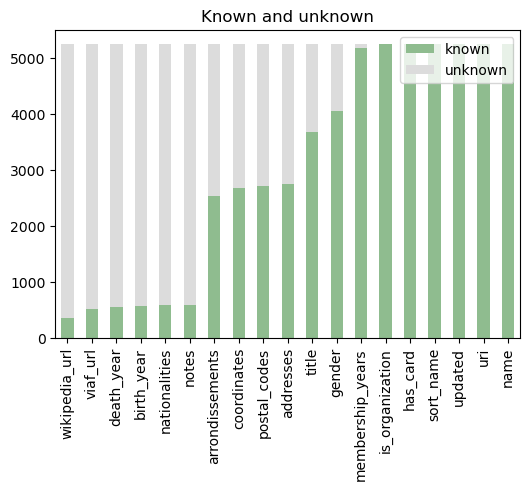

In [6]:
total_members = len(members.index)
known_unknown = pd.DataFrame()
known_unknown['known'] = known_members['total']

known_unknown['unknown'] = known_members.total.apply(lambda x: total_members - x)

known_unknown.plot(kind='bar', title='Known and unknown', stacked=True, color=['darkseagreen', 'gainsboro'], figsize=(6,4))

## Book: Completeness

In [7]:
total_known = {}
for field in books.columns:
    total_known[field] = percent_known(books, field)

6020 with uri : 100%
6020 with title : 100%
5287 with author : 88%
424 with editor : 7%
277 with translator : 5%
72 with introduction : 1%
20 with illustrator : 0%
2 with photographer : 0%
5300 with year : 88%
5610 with format : 93%
6020 with uncertain : 100%
3155 with ebook_url : 52%
266 with volumes_issues : 4%
625 with notes : 10%
6020 with event_count : 100%
6020 with borrow_count : 100%
6020 with purchase_count : 100%
5988 with circulation_years : 99%
6020 with updated : 100%


In [8]:
known_books = pd.DataFrame({'total': total_known})
known_books['percent'] = (known_books['total'] / len(books))*100
known_books = known_books.sort_values(by=['total'])
known_books.percent = known_books.percent.round(2)
known_books

,total,percent
photographer,2,0.03
illustrator,20,0.33
introduction,72,1.20
volumes_issues,266,4.42
translator,277,4.60
editor,424,7.04
notes,625,10.38
ebook_url,3155,52.41
author,5287,87.82
year,5300,88.04


<Axes: title={'center': 'Known and unknown'}>

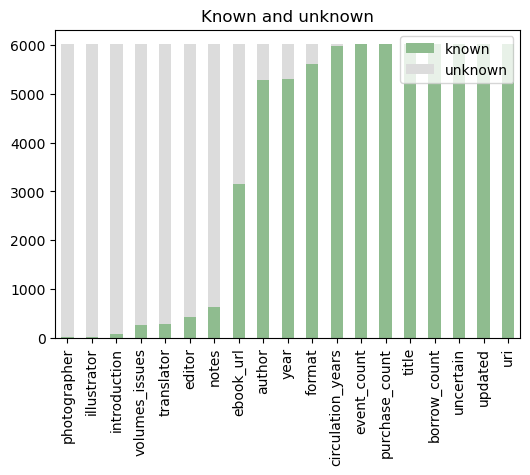

In [9]:
total_books = len(books.index)
known_unknown = pd.DataFrame()
known_unknown['known'] = known_books['total']

known_unknown['unknown'] = known_books.total.apply(lambda x: total_books - x)

known_unknown.plot(kind='bar', title='Known and unknown', stacked=True, color=['darkseagreen', 'gainsboro'], figsize=(6,4))

## Event: Completeness

In [10]:
total_known = {}
for field in events.columns:
    total_known[field] = percent_known(events, field)

35523 with event_type : 100%
35104 with start_date : 99%
33068 with end_date : 93%
35523 with member_uris : 100%
35523 with member_names : 100%
35523 with member_sort_names : 100%
9103 with subscription_price_paid : 26%
4087 with subscription_deposit : 12%
9144 with subscription_duration : 26%
9146 with subscription_duration_days : 26%
8749 with subscription_volumes : 25%
1568 with subscription_category : 4%
9902 with subscription_purchase_date : 28%
2811 with reimbursement_refund : 8%
21059 with borrow_status : 59%
19728 with borrow_duration_days : 56%
760 with purchase_price : 2%
13463 with currency : 38%
22484 with item_uri : 63%
22484 with item_title : 63%
1107 with item_volume : 3%
20250 with item_authors : 57%
20236 with item_year : 57%
1548 with item_notes : 4%
35523 with source_type : 100%
35523 with source_citation : 100%
24012 with source_manifest : 68%
24002 with source_image : 68%


In [11]:
known_events = pd.DataFrame({'total': total_known})
known_events['percent'] = (known_events['total'] / len(events))*100
known_events = known_events.sort_values(by=['total'])
known_events.percent = known_events.percent.round(2)
known_events

,total,percent
purchase_price,760,2.14
item_volume,1107,3.12
item_notes,1548,4.36
subscription_category,1568,4.41
reimbursement_refund,2811,7.91
subscription_deposit,4087,11.51
subscription_volumes,8749,24.63
subscription_price_paid,9103,25.63
subscription_duration,9144,25.74
subscription_duration_days,9146,25.75


<Axes: title={'center': 'Known and unknown'}>

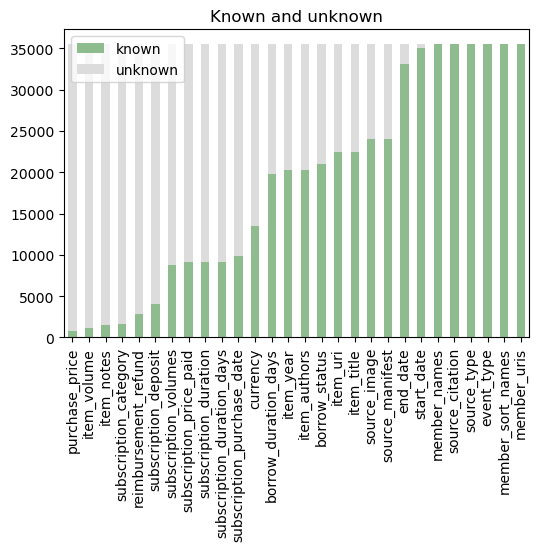

In [12]:
total_events = len(events.index)
known_unknown = pd.DataFrame()
known_unknown['known'] = known_events['total']

known_unknown['unknown'] = known_events.total.apply(lambda x: total_events - x)

known_unknown.plot(kind='bar', title='Known and unknown', stacked=True, color=['darkseagreen', 'gainsboro'], figsize=(6,4))